Presentado por: Juliana Andrea Amézquita Abello

# Quality Red Wine

Datos tomados de <a href='https://archive.ics.uci.edu/ml/datasets/wine+quality'>UCI Machine Learning Repository</a>

Referencia: 
P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis.
Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.




# Contexto

El conjunto de datos está relacionado con variantes rojas del vino Portugués "Vinho Verde". El dataset contiene diferentes muestras de vinos cada uno registra atributos fisicoquímicos como el PH, la cantidad de alcohol, etc. Basado en esas características el dataset contiene una clasificación de calidad.


# Objetivo

El conjunto de datos está relacionado con variantes rojas del vino Portugués "Vinho Verde". El dataset contiene diferentes muestras de vinos cada uno registra atributos fisicoquímicos con los que se obtiene una calificación de calidad del vino. El objetivo de este apartado será mediante un modelo de aprendizaje supervisado predecir la calidad de los vinos basado en sus atributos. Para resolver esta cuestión se utilizará un modelo de red neuronal y un modelo de ensemble learning.

In [1]:
# Se importan las librerias a utilizar
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
sns.set()

# Análisis Exploratorio de Datos



## Carga de Datos

In [2]:
# Carga de datos

url = 'https://github.com/juli-amezquita/Quality-red-wine/blob/main/uci_winequality-red.csv?raw=true'

# Se crea un dataframe con los datos
data = pd.read_csv(url, sep=';')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Caracterización de variables

In [3]:
# Exploramos la estructura de nuestros datos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB



1. fixed acidity: Variable continua. Entendida como la mayoría de ácidos involucrados en el vino.
2. volatile acidity: Variable continua. Entendida como la cantidad de ácido acético en el vino. En niveles altos puede provocar un sabor fuerte a vinagre.
3. citric acid: Variabe continua. Generalmente se encuentra en pequeñas cantidades. Agrega 'frescura' y sabor a los vinos.
4. residual sugar: Variable continua. Entendida como la cantidad de azúcar que queda después de la fermentación.
5. chlorides: Variable continua. Entendida como la cantidad de sal en el vino.
6. free sulfur dioxide: Variable continua. Entendida como el dióxido de azufre libre (SO2) en el vino.
7. total sulfur dioxide: Variable continua. Entendida como la cantidad de formas libres y ligadas de S02. 
8. density: Variable continua. Entendida como la densidad del agua, depende del porcentaje de contenido de alcohol y azúcar
9. pH: Variable continua. Describe qué tan ácido o básico es un vino.
10. sulphates: Variable continua. Entendida como un aditivo enológico que puede contribuir a los niveles de dióxido de azufre (S02).
11. alcohol: Variable continua. Entendida como el porcentaje de contenido de alcohol del vino.

**Variable objetivo:**
12. quality: Variable discreta (tiene 6 clases). Entendida como la calificación que se le da a cada vino entre 1 y 6) 

## Valores faltantes

In [4]:
print("Total Valores Faltantes por Columna")
print(data.isna().sum())

Total Valores Faltantes por Columna
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


## Valores duplicados

Revisamos si existen duplicados en el dataset

In [5]:
sum(data.duplicated())

240

In [6]:
data[data.duplicated()]['quality'].value_counts()

5    104
6    103
7     32
8      1
Name: quality, dtype: int64

hay presencia de 240 datos duplicados y están distribuidos en varias de las clases. 

Procedemos a eliminar los duplicados.

In [7]:
data.drop_duplicates(inplace=True)

In [8]:
# Revisamos el tamaño de nuestro nuevo dataset
data.shape

(1359, 12)

## Distribución variable objetivo

,quality,total
0,3,10
1,4,53
2,5,577
3,6,535
4,7,167
5,8,17


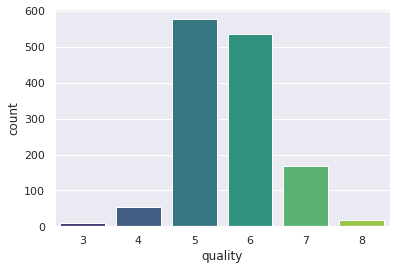

In [9]:
# Se verifica la distribución de la variable a predecir para saber si se tiene un conjunto de datos balanceado

ax = sns.countplot(x="quality", data=data, palette = "viridis")
disty= pd.DataFrame(data.groupby(["quality"], sort=True)["quality"].count().reset_index(name="total"))
disty

Se observa que las clases de nuestra variable objetivo no están equilibradas (por ejemplo, hay muchos más vinos normales con calificación de 5 y 6 que vinos excelentes o malos). De igual manera, se observa que se tienen 6 diferentes clases dentro de la variable objetivo y aunque están ordenadas no empiezan desde 0. Se hará una transformación para re-enumerar las categorías para esto utilizamos LabelEncoder pues nuestra variable objetivo tiene un orden específico y LabelEncoder lo conserva.

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['quality'] = le.fit_transform(data['quality'])

In [11]:
# Revisamos la numeración de las categorías
pd.DataFrame(data.groupby(["quality"], sort=True)["quality"].count().reset_index(name="total"))

,quality,total
0,0,10
1,1,53
2,2,577
3,3,535
4,4,167
5,5,17


## Distribución variables predictoras

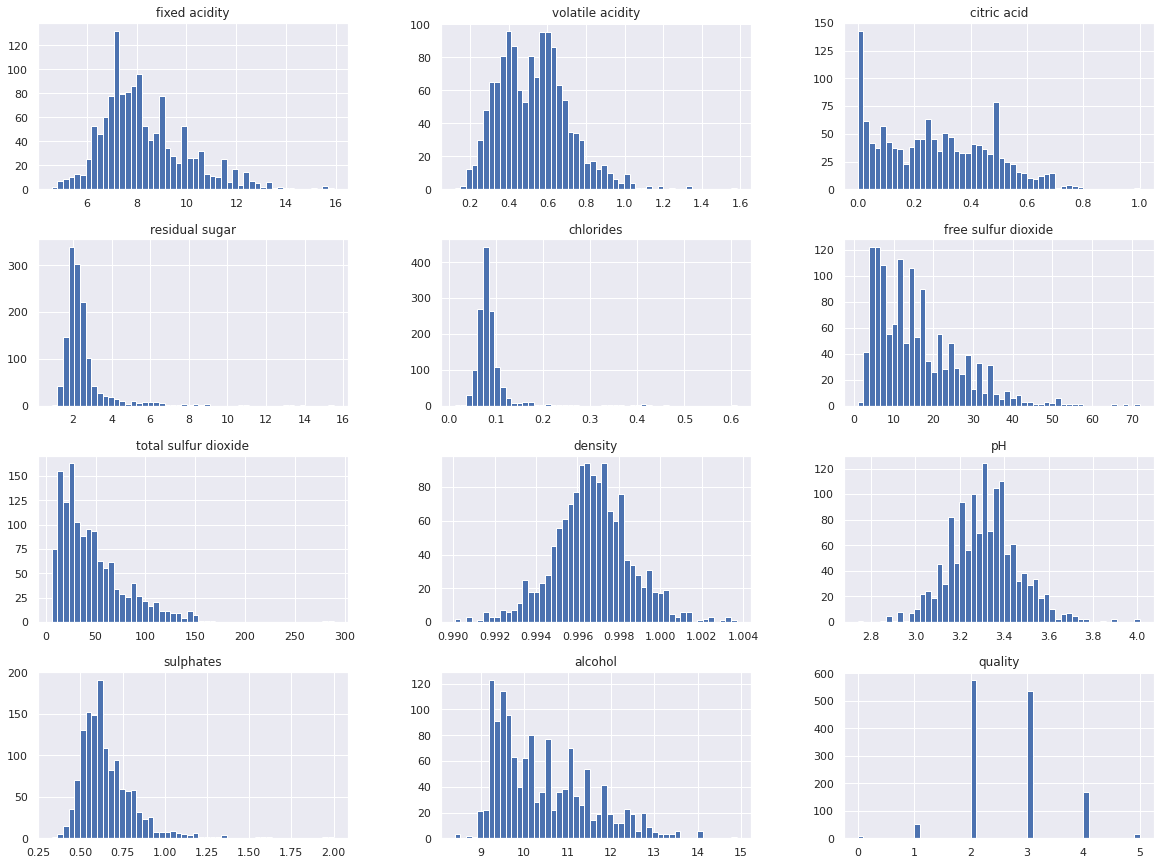

In [12]:
data.hist(bins=50, figsize=(20,15))
plt.show()

## Análisis de correlaciones

,quality
alcohol,0.480343
volatile acidity,0.395214
sulphates,0.248835
citric acid,0.228057
density,0.184252
total sulfur dioxide,0.177855
chlorides,0.130988
fixed acidity,0.119024
pH,0.055245
free sulfur dioxide,0.050463


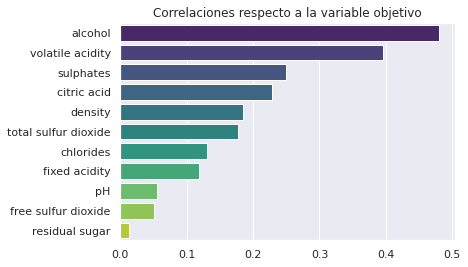

In [13]:
correlaciones =data.corr().abs()['quality'].sort_values(ascending=False)[1:]
ax = sns.barplot(x=correlaciones.values,y=correlaciones.index, palette = "viridis").set_title('Correlaciones respecto a la variable objetivo')
df_correlaciones = pd.DataFrame(correlaciones)
df_correlaciones

Las variables con mayor correlación a nuestra variable objetivo son 'alcohol' y 'volatile acidity' con 47% y 39% respectivamente. Las variables con menor correlación son 'residual sugar', 'free sulfur dioxide' y 'pH'. Lo anterior indica que no todas las variables de entrada son relevantes para predecir la calidad de los vinos. 

## Análisis de valores atípicos

In [14]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

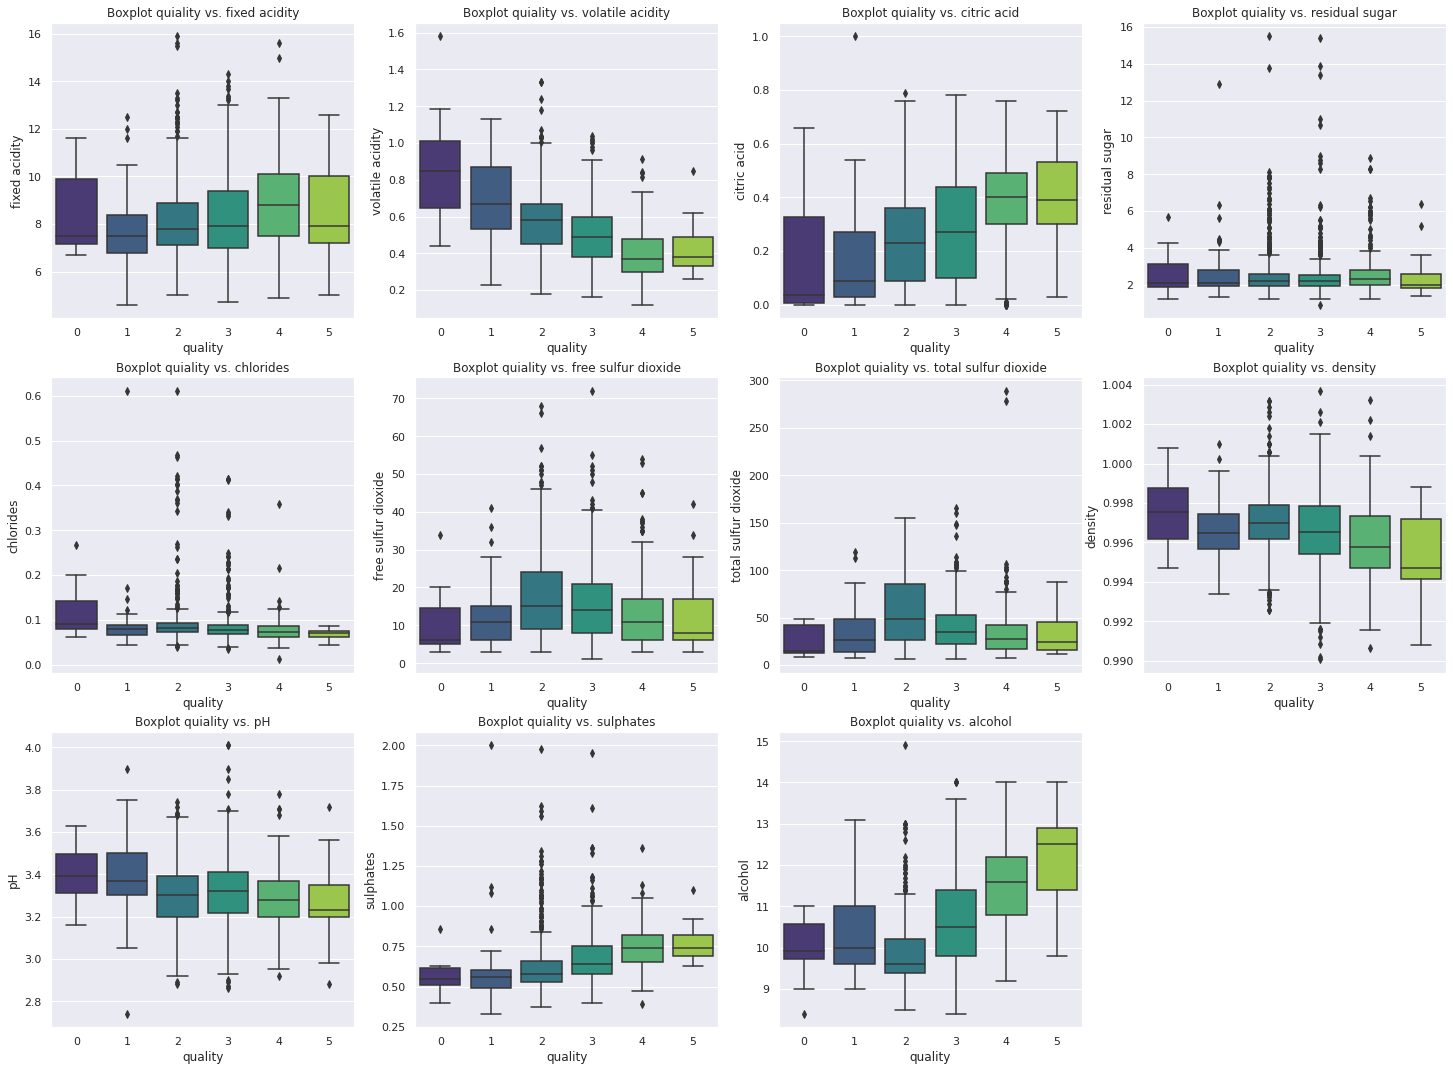

In [15]:
plt.figure(figsize=(25,25))
var =['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']
for i, var in enumerate(var):
    plt.subplot(4,4,i+1)
    sns.boxplot(y = var, x='quality', data = data, palette = 'viridis')
    title_string = "Boxplot quiality vs. " + var
    plt.title(title_string)



Dado que las variables predictoras cuentan con diferentes distribuciones y además se tienen varios valores atípicos, se decide normalizar con el propósito de que el entrenamiento del modelo sea menos sensible a la escala de los atributos. La normalización hace que los atributos sean más consecuentes entre sí, lo que permite que el modelo prediga los resultados con mejor precisión.

**Revisamos algunas estadísticas de nuestro dataset**

In [16]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1359.0,8.310596,1.736990,4.60000,7.1000,7.9000,9.20000,15.90000
volatile acidity,1359.0,0.529478,0.183031,0.12000,0.3900,0.5200,0.64000,1.58000
citric acid,1359.0,0.272333,0.195537,0.00000,0.0900,0.2600,0.43000,1.00000
residual sugar,1359.0,2.523400,1.352314,0.90000,1.9000,2.2000,2.60000,15.50000
chlorides,1359.0,0.088124,0.049377,0.01200,0.0700,0.0790,0.09100,0.61100
free sulfur dioxide,1359.0,15.893304,10.447270,1.00000,7.0000,14.0000,21.00000,72.00000
total sulfur dioxide,1359.0,46.825975,33.408946,6.00000,22.0000,38.0000,63.00000,289.00000
density,1359.0,0.996709,0.001869,0.99007,0.9956,0.9967,0.99782,1.00369
pH,1359.0,3.309787,0.155036,2.74000,3.2100,3.3100,3.40000,4.01000
sulphates,1359.0,0.658705,0.170667,0.33000,0.5500,0.6200,0.73000,2.00000


# Normalización

In [17]:
# Normalizamos las variables predictoras 

from sklearn.preprocessing import Normalizer

norm = Normalizer()
X_prep = norm.fit_transform(data.drop(['quality'], axis=1))


In [18]:
X_prep = pd.DataFrame(X_prep, columns= ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'])
X_prep.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.195153,0.018460,0.000000,0.050107,0.002004,0.290092,0.896647,0.026314,0.092566,0.014768,0.247896
1,0.107241,0.012099,0.000000,0.035747,0.001347,0.343722,0.921175,0.013705,0.043996,0.009349,0.134739
2,0.135457,0.013198,0.000695,0.039942,0.001598,0.260494,0.937777,0.017314,0.056614,0.011288,0.170189
3,0.174367,0.004359,0.008718,0.029580,0.001168,0.264664,0.934108,0.015537,0.049196,0.009030,0.152571
4,0.168468,0.015026,0.000000,0.040979,0.001707,0.295957,0.910637,0.022716,0.079908,0.012749,0.214000


Hemos normalizado nuestros datos y ahora se encuentran en un rango entre [0,1]

In [19]:
X_prep.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1359.0,0.219369,0.129666,0.027062,0.113678,0.184837,0.307300,0.686743
volatile acidity,1359.0,0.013766,0.009584,0.001028,0.007062,0.011247,0.017693,0.090784
citric acid,1359.0,0.007066,0.007190,0.000000,0.001894,0.004329,0.010101,0.038751
residual sugar,1359.0,0.063730,0.045847,0.007771,0.033029,0.053258,0.080298,0.486839
chlorides,1359.0,0.002269,0.001734,0.000112,0.001156,0.001850,0.002814,0.020401
free sulfur dioxide,1359.0,0.308594,0.114383,0.021791,0.221418,0.295957,0.385796,0.621347
total sulfur dioxide,1359.0,0.833405,0.120453,0.337742,0.771383,0.858333,0.927303,0.990514
density,1359.0,0.026068,0.014003,0.003402,0.014514,0.022716,0.036007,0.064150
pH,1359.0,0.086611,0.046773,0.010311,0.048391,0.076627,0.118860,0.218226
sulphates,1359.0,0.017035,0.009625,0.001747,0.009314,0.014890,0.023645,0.061545


# Separación de los datos train_test_split

In [20]:
# Separamos la variable objetivo
y = data['quality']
type(y)

pandas.core.series.Series

Se dividen los datos en un grupo de train y de test de la siguiente manera: un 80% para el conjunto de entrenamiento (X_train y y_train) y un 20% para el conjunto de evaluación o test (X_testy y_test). Dado que tenemos un conjunto de datos desbalanceado hacemos uso del parámetro stratify que ayuda a que cuando se haga la división de los subconjuntos de entrenamiento y prueba se haga con las mismas proporciones de etiquetas de clase que el conjunto de datos original.

In [21]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_prep, y, test_size=0.2, random_state=42, stratify= y)

Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape

((1087, 11), (272, 11), (1087,), (272,))

# Modelo Random Forest

Utilizamos un modelo de Clasificación Random Forest como modelo base para comparar sus resultados con los resultados de un modelo de red neuronal.

El modelo de Random Forest utiliza métodos de bagging, lo que quiere decir que ajustan múltiples modelos, cada uno con un subconjunto distinto de datos de entrenamiento. Lo cual es muy bueno porque el modelo logra encontrar un equilibrio entre sesgo y varianza.

Se instancia utilizando el parámetro class_weight “balanced” ya que nuestros datos están desbalanceados y entropia para la ganancia de información entendida como la función para medir la calidad de una división. Luego se mediante GridSearchCV con validación repetida buscamos los mejores hiperparámetros.





In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

# Hiperparámetros a optimizar 
param_grid = {'max_depth': [None, 5,15], # La profundidad máxima que puede alcanzar los árboles.
              'ccp_alpha':[0,5,15],  # Parámetro de complejidad utilizado para la poda
              'max_features': ['auto',2,3], # La cantidad de predictores que se deben considerar al buscar la mejor división, 'auto'(significa que utiliza todos los predictores)
              'min_samples_split':[2,10,15], # El número mínimo de muestras requeridas para dividir un nodo interno 
              'min_samples_leaf':[1,10,15],  # El número mínimo de muestras requeridas para estar en un nodo hoja        
                   
}

# GridSearchCV por validación cruzada repetida 

grid = GridSearchCV(estimator = RandomForestClassifier(class_weight= 'balanced', criterion= 'entropy'),
                    param_grid = param_grid,
                    n_jobs= -1,
                    cv= RepeatedStratifiedKFold(n_splits=3, n_repeats=2),
                    refit= True,
                    verbose= 3,
                    return_train_score = True)

grid.fit(Xtrain, ytrain)

Fitting 6 folds for each of 243 candidates, totalling 1458 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=2, n_splits=3, random_state=None),
             estimator=RandomForestClassifier(class_weight='balanced',
                                              criterion='entropy'),
             n_jobs=-1,
             param_grid={'ccp_alpha': [0, 5, 15], 'max_depth': [None, 5, 15],
                         'max_features': ['auto', 2, 3],
                         'min_samples_leaf': [1, 10, 15],
                         'min_samples_split': [2, 10, 15]},
             return_train_score=True, verbose=3)

In [23]:
print('Mejores hiperparámetros: ', grid.best_params_)

Mejores hiperparámetros:  {'ccp_alpha': 0, 'max_depth': 15, 'max_features': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}


## Evaluación del modelo

Para evaluar el modelo utilzamos como métrica de evaluación el puntaje F1 que es el promedio ponderado de 'precision' y 'recall'. Recordemos que 'precision' es la relación entre las observaciones positivas predichas correctamente y el total de observaciones positivas y 'recall' es la tasa de verdaderos positivos, es decir, la tasa de observaciones positivas predichas correctamente respecto a todas las observaciones positivas reales. 

Por lo anterior, este resultado tiene en cuenta tanto los falsos positivos y falsos negativos y por eso se considera como mejor métrica en datasets desbalanceados. La ecuación del puntaje F1 es como sigue:


<center> F1 = 2 * (precision * recall) / (precision + recall)<center>

In [24]:
from sklearn.metrics import f1_score, balanced_accuracy_score

modelo_optimizado = grid.best_estimator_
predicciones = modelo_optimizado.predict(X = Xtest)

metricaf1 = f1_score(ytest, predicciones, average='micro', labels=np.unique(predicciones)) # average = mircro --> Calcule métricas globalmente contando el total de verdaderos positivos, falsos negativos y falsos positivos.
print(f"El puntaje de F1 es: {round(100 * metricaf1, 2)} %")

balancedAccuracy = balanced_accuracy_score(ytest, predicciones)
print(f"El puntaje de balanced accuracy es: {round(100 * balancedAccuracy, 2)} %")

El puntaje de F1 es: 57.14 %
El puntaje de balanced accuracy es: 27.3 %


In [25]:
from sklearn.metrics import confusion_matrix

print("Matriz de confusión")
pd.DataFrame(confusion_matrix(ytest, predicciones),
             columns= ['0', '1', '2', '3', '4', '5'],
             index = ['0', '1', '2', '3', '4', '5'])

Matriz de confusión


,0,1,2,3,4,5
0,0,1,1,0,0,0
1,0,0,7,4,0,0
2,0,0,73,42,1,0
3,0,0,30,69,8,0
4,0,0,4,17,12,0
5,0,0,0,2,1,0


In [26]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report
print(classification_report(ytest, predicciones))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00        11
           2       0.63      0.63      0.63       116
           3       0.51      0.64      0.57       107
           4       0.55      0.36      0.44        33
           5       0.00      0.00      0.00         3

    accuracy                           0.57       272
   macro avg       0.28      0.27      0.27       272
weighted avg       0.54      0.57      0.55       272



Los resultados obtenidos no son buenos debido al desbalanceo que existe entre las clases de la variable objetivo. Como se evidencia en el reporte de clasificación y en la matriz de confusión, el modelo no es capaz de hacer predicciones para las clases 0, 1 y 5, esto debido a que son las clases minoritariamente representadas en el dataset. Realmente, para solucionar esta situación y mejorar las predicciones de los modelos es necesario tener más datos para representar cada una de las clases en el dataset o definir el problema como un  problema de clasificación binaria en donde sólo se tengan dos clases (buena calidad o mala calidad, 0 y 1 respectivamente). En una próxima entrega podríamos intentar correr los modelos bajo un nuevo problema de clasificación binaria y ver cómo se comporta. 

## Importancia de los predictores

In [27]:
importancia_predictores = pd.DataFrame(
                            {'Variable Predictora': list(Xtest),
                             'Importancia': modelo_optimizado.feature_importances_}
                            )
importancia_predictores.sort_values('Importancia', ascending=False)

,Variable Predictora,Importancia
1,volatile acidity,0.148700
4,chlorides,0.113626
9,sulphates,0.099634
10,alcohol,0.096158
2,citric acid,0.094805
6,total sulfur dioxide,0.086078
3,residual sugar,0.081905
7,density,0.077083
8,pH,0.074177
0,fixed acidity,0.070224


El modelo utiliza principalmente los atributos volatile acidity y chlorides para hacer las predicciones. Esto coincide en parte con el análisis de correlaciones que se había hecho antes. 

# Modelo Redes Neuronales

## Preprocesado de datos

Antes de entrenar la red neuronal se usará la codificación de OneHot para transformar las etiquetas de la variable objetivo en un vector.

In [28]:
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(ytrain, num_classes=6)
y_test = to_categorical(ytest, num_classes=6)

ahora podemos ver que se han convertido las etiquetas en un vector de ceros y unos. Donde se ubica el 1 corresponde al valor de la etiqueda.

Si por ejemplo hacemos y_test[0], veremos que donde se ubica el 1 correspondería al valor de la calidad con que fue clasificado el vino, en este caso cuando corremos podemos identificar que la clasificación es 2 ya que se ubica en la tercera posición del vector.

In [29]:
y_train.shape, y_test.shape, y_test[0]

((1087, 6), (272, 6), array([0., 0., 1., 0., 0., 0.], dtype=float32))

## Definición del modelo

La red neuronal será configurada con 2 capas ocultas densamente conectadas, una capa de entrada y una de salida. Cada una de las capas ocultas tiene 15 neuronas, la capa de entrada fue configurada con 6 neuronas e igualmente la capa de salida fue configurada con 6 neuronas lo que indica que devolverá una matriz de 6 valores de probabilidad, que representan las 6 categorías o calificaciones de calidad posibles en el dataset.

Para cada capa indicamos una función de activación 'softmax' utilizadas en problemas de clasificación con múltiples clases en la variable de salida, como es nuestro caso. La función 'softmax' nos devolverá un vector con la distribución de probabilidad sobre cada una de las clases de salida, es decir, nos dice qué tan probable es que la calidad del vino esté en cada una de las calificaciones entre 0 y 5. Al final para que esté correcto el vector resultante con todas las probabilidades debería sumar 1. 

In [30]:
# Librerías a importar
%tensorflow_version 2.x
import tensorflow as tf
import keras
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten

print(tf.__version__)

2.7.0


In [31]:
def build_model():  
  model = Sequential()
  model.add(Dense(6,input_shape=[len(Xtrain.keys())]))
  model.add(Dense(15, activation='softmax'))
  model.add(Dense(15, activation='relu'))
  model.add(Dense(6, activation= 'softmax'))
  return model

model = build_model()

# Revisamos la arquitectura de la red
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 72        
                                                                 
 dense_1 (Dense)             (None, 15)                105       
                                                                 
 dense_2 (Dense)             (None, 15)                240       
                                                                 
 dense_3 (Dense)             (None, 6)                 96        
                                                                 
Total params: 513
Trainable params: 513
Non-trainable params: 0
_________________________________________________________________


## Parada temprana

Se crea una 'parada temprana' o 'early stopping' que nos ayude a prevenir el sobreajuste del modelo. Con esta función haremos que el modelo "pare automáticamente" en el momento en el que las métricas de la función de pérdida en los datos de entrenamiento dejen de mejorar. Esto influye directamente en el número de 'epochs', el cual nos indica el número de veces que los datos pasan por la red neuronal durante el entrenamiento (el fit) del modelo.

In [32]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

## Compile

* Función de pérdida: Se utiliza la función softmax utilizada comunmente en modelos de clasificación múltiple.
* Optimizador: Se decide utilizar el optmizador RMSprop con un ratio de aprendizaje de 0,001.
* Métricas elegidas: Como se ha venido mencionando, dado que tenemos un dataset desbalanceado utilizamos como métricas de evaluación Precision y Recall para calcular el puntaje F1 que nos permitirá tener representación real del rendimiento del modelo. Se pone tabién la métrica 'accuracy' simplemente par hacer una comparación, pero ya se sabe que no es la métrica ideal en casos de dataset desbalanceados porque puede resultar engañosa.

In [33]:
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001)

model.compile(loss='categorical_crossentropy',
              optimizer= optimizer,
              metrics=[tf.keras.metrics.Precision(),tf.keras.metrics.Recall(), 'accuracy'])

## Entrenamiento del modelo

Para entrenar el modelo definimos 1000 "epochs", lo cual significa que los datos pasarán por la red neuronal 1000 veces durante el entrenamiento. Dado que un número muy alto de "epochs" puede generar sobreajuste y a futuro impedir que el modelo generalice bien frente a un conjunto de datos nuevo, en el paso anterior, se creó una parada temprana para ayudar a la red neuronal en no caer en este error. 

Se define un "batch_size" de 100, lo que significa que el modelo está dividiendo los datos en un tamaño de 100 lotes en cada iteración del entrenamiento.

In [34]:
history = model.fit(Xtrain, y_train, epochs=1000, batch_size = 100,
                    validation_split = 0.2, verbose=2, callbacks=[early_stop] )

Epoch 1/1000
9/9 - 3s - loss: 1.7886 - precision: 0.0000e+00 - recall: 0.0000e+00 - accuracy: 0.2497 - val_loss: 1.7745 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_accuracy: 0.3761 - 3s/epoch - 338ms/step
Epoch 2/1000
9/9 - 0s - loss: 1.7651 - precision: 0.0000e+00 - recall: 0.0000e+00 - accuracy: 0.3982 - val_loss: 1.7552 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_accuracy: 0.3761 - 62ms/epoch - 7ms/step
Epoch 3/1000
9/9 - 0s - loss: 1.7472 - precision: 0.0000e+00 - recall: 0.0000e+00 - accuracy: 0.3982 - val_loss: 1.7379 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_accuracy: 0.3761 - 56ms/epoch - 6ms/step
Epoch 4/1000
9/9 - 0s - loss: 1.7304 - precision: 0.0000e+00 - recall: 0.0000e+00 - accuracy: 0.4085 - val_loss: 1.7214 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_accuracy: 0.3761 - 56ms/epoch - 6ms/step
Epoch 5/1000
9/9 - 0s - loss: 1.7137 - precision: 0.0000e+00 - recall: 0.0000e+00 - accuracy: 0.4085 - val_loss: 1.7044 

## Evaluación del modelo

In [35]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,precision,recall,accuracy,val_loss,val_precision,val_recall,val_accuracy,epoch
202,1.147357,0.613971,0.192175,0.487917,1.144061,0.692308,0.165138,0.518349,202
203,1.146885,0.612319,0.194476,0.492520,1.145270,0.686275,0.160550,0.500000,203
204,1.146523,0.625954,0.188723,0.491369,1.143036,0.698113,0.169725,0.522936,204
205,1.146633,0.604982,0.195627,0.494822,1.144472,0.692308,0.165138,0.509174,205
206,1.146805,0.612782,0.187572,0.498274,1.143206,0.698113,0.169725,0.522936,206


In [36]:
loss, precision, recall, accuracy = model.evaluate(Xtest, y_test)

print("Testing set Precision: {:5.2f}".format(precision))
print("Testing set Recall: {:5.2f}".format(recall))
print("Testing set accuracy: {:5.2f}".format(accuracy))

9/9 [==============================] - 0s 4ms/step - loss: 1.1201 - precision: 0.7089 - recall: 0.2059 - accuracy: 0.5404
Testing set Precision:  0.71
Testing set Recall:  0.21
Testing set accuracy:  0.54


Hacemos el cálculo del puntaje F1:

F1 = 2 * (precision * recall) / (precision + recall)

In [42]:
F1_Score = 2 * (0.71* 0.21) / (0.71 + 0.21)
print('F1_Score =', round(F1_Score*100, 2),'%')

F1_Score = 32.41 %


## Predicciones

In [38]:
# Utilizamos el método predict en los datos de entrenamiento y test
y_train_pred = model.predict(Xtrain)
y_test_pred = model.predict(Xtest)

Intentamos hacer la predicción en una muestra específica.

In [39]:
print(y_test_pred[15])

[0.00850377 0.03848386 0.36520365 0.44593784 0.12835698 0.01351388]


Revisamos cuál es el índice o posición que contiene el valor más alto para el elemento 15.

In [40]:
np.argmax(y_test_pred[15])

3

Cuando corremos vemos que la posición es la 3, es decir, el modelo predice que para la observación 15 el puntaje de calidad de ese vino en particular es 3 con un 45% de probabilidad. 

También podemos comprobar que el resultado de la predicción es un vector cuya suma de elementos es igual a 1, lo cual permite concluir que es una predicción correcta.

In [41]:
np.sum(y_test_pred[15])

1.0